In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Imports the data and puts it into a pandas dataframe
results_df = pd.read_csv('Results/2019.11.11-142137/results.log',sep='\t', header = 0)
# Rename the column to drop the '\t'
results_df.columns=['N_pol','Mean','Std','Seed','FracP']

<Container object of 3 artists>

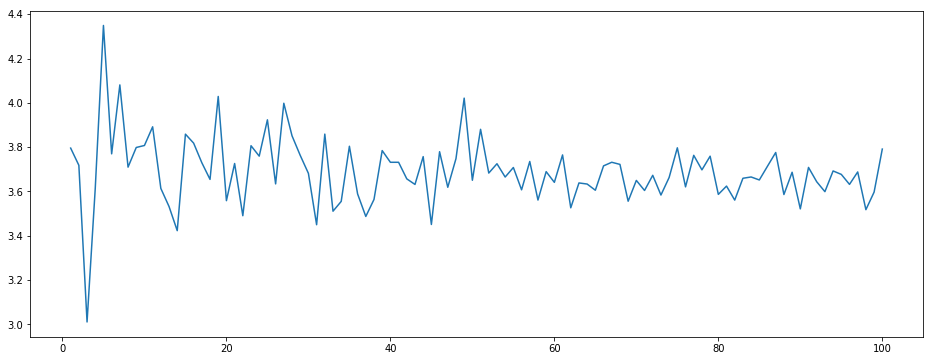

In [3]:
# Return the rows for the first of the seed
results_df2 = results_df[results_df['Seed'].apply(lambda line: line == -8349.0)]
# Plot the EE length vs the number of polymers in solution for only one of the multiple seeds
plt.figure(figsize=(16,6))
plt.errorbar(results_df2.N_pol, results_df2.Mean)

In [4]:
# Takes the mean for all seeds, then plot mean Ree length for all seeds vs number of polymers in solution
results_df_mean = results_df.groupby(['N_pol']).mean()
results_df_mean.head()

,Mean,Std,Seed,FracP
N_pol,,,,
1.0,3.76624,0.87204,-6834.0,0.0001
2.0,4.00342,0.56196,-6834.0,0.0002
3.0,3.41256,0.35968,-6834.0,0.0003
4.0,4.06092,0.29238,-6834.0,0.0004
5.0,3.79416,0.33074,-6834.0,0.0005


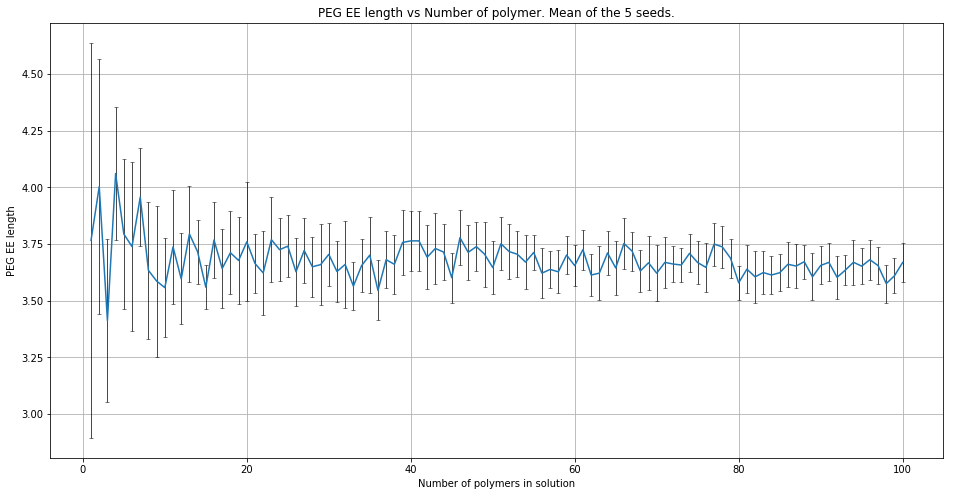

In [5]:
plt.figure(figsize=(16,8))
plt.errorbar(results_df_mean.index, results_df_mean['Mean'], yerr=results_df_mean['Std'], ecolor='k', elinewidth=0.7, capthick=0.5, capsize=2)
plt.xlabel('Number of polymers in solution')
plt.ylabel('PEG EE length')
plt.title('PEG EE length vs Number of polymer. Mean of the 5 seeds.')
plt.grid()

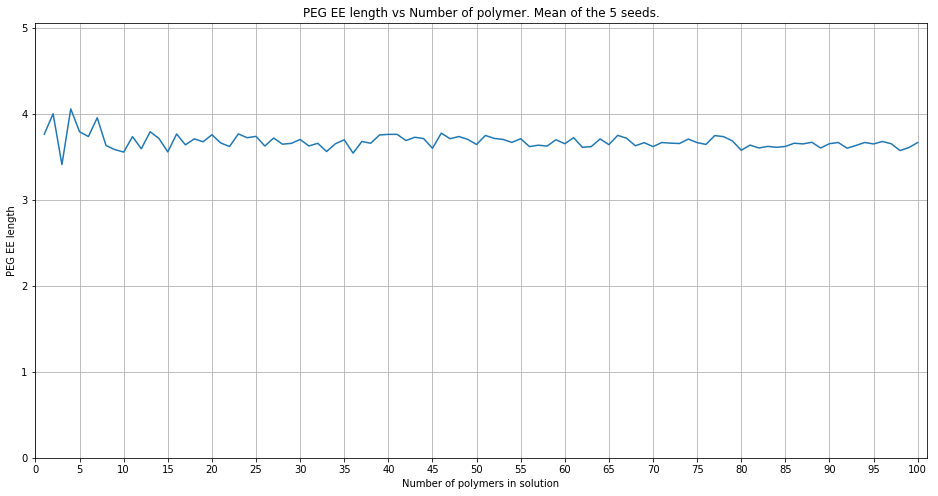

In [6]:
plt.figure(figsize=(16,8))
plt.plot(results_df_mean.index, results_df_mean.Mean)

plt.xlabel('Number of polymers in solution')
plt.ylabel('PEG EE length')
plt.title('PEG EE length vs Number of polymer. Mean of the 5 seeds.')

plt.xlim([-0.1,101.1])
plt.ylim([0,results_df_mean.Mean.max()+1])
plt.grid(which='both')
plt.xticks(range(0,105,5));

We can observe an interesting regime below 10 polymers in solution. All points above that number will present a low variability in polymer EE length, whereas the variability is higher between 0 and 10. This will thus be region we will study more closely from now on.

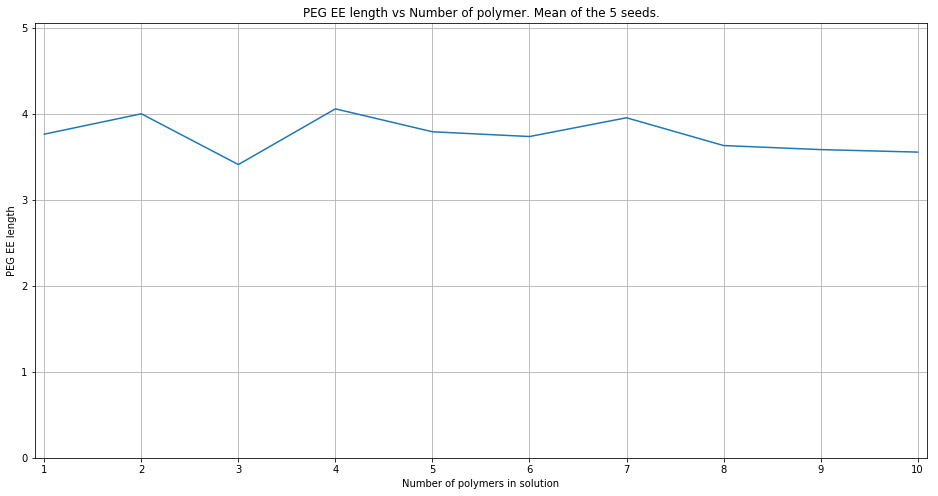

In [7]:
# Imports the data and puts it into a pandas dataframe
advanced_df = pd.read_csv('Results/2019.11.12-172724/results.log',sep='\t', header = 0)
# Rename the column to drop the '\t'
advanced_df.columns=['N_pol','Mean','Std','Seed','FracP']

# Takes the mean for all seeds, then plot mean Ree length for all seeds vs number of polymers in solution
advanced_df_mean = advanced_df.groupby(['N_pol']).mean()

plt.figure(figsize=(16,8))
plt.plot(advanced_df_mean.index, advanced_df_mean.Mean)

plt.xlabel('Number of polymers in solution')
plt.ylabel('PEG EE length')
plt.title('PEG EE length vs Number of polymer. Mean of the 5 seeds.')

plt.xlim([.9,10.1])
plt.ylim([0,advanced_df_mean.Mean.max()+1])
plt.grid(which='both')
plt.xticks(range(1,11,1));

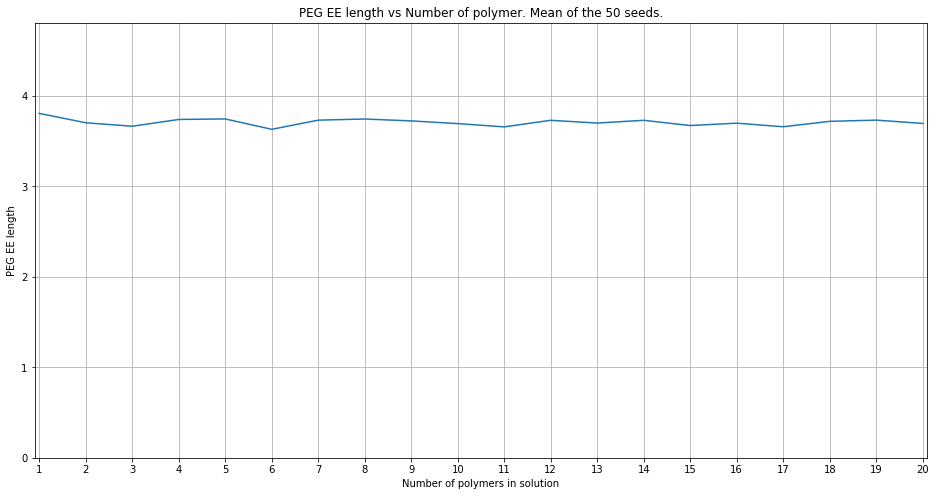

In [8]:
# Imports the data and puts it into a pandas dataframe
advanced_df2 = pd.read_csv('Results/2019.11.13-115702/results.log',sep='\t', header = 0)
# Rename the column to drop the '\t'
advanced_df2.columns=['N_pol','Mean','Std','Seed','FracP']

# Takes the mean for all seeds, then plot mean Ree length for all seeds vs number of polymers in solution
advanced_df2_mean = advanced_df2.groupby(['N_pol']).mean()

plt.figure(figsize=(16,8))
plt.plot(advanced_df2_mean.index, advanced_df2_mean.Mean)

plt.xlabel('Number of polymers in solution')
plt.ylabel('PEG EE length')
plt.title('PEG EE length vs Number of polymer. Mean of the 50 seeds.')

plt.xlim([.9,20.1])
plt.ylim([0,advanced_df2_mean.Mean.max()+1])
plt.grid(which='both')
plt.xticks(range(1,21,1));

We do not observe a variation in polymer length in function of polymer density. This can probably be explained by the polymers being too short, or alternatively due to the polymers being too hydrophilic. A possible solution would be too make the polymer's self interaction very high (a<sub>pp</sub>=50, a<sub>wp</sub>=a<sub>ww</sub>=25))

If I want to use branched polymer to measure the effect of artificial crowding due to this branch, I should use radius of gyration instead of L<sub>ee</sub>. I would need to use the same metrics for linear polymers.

If I want to know a critical length for linear polymer, I can plot R<sub>ee</sub><sup>2</sup> in function of polymer's length for a set number of polymers present in solution.

I also made the bonds between beads somewhat stiff so that polymers try to remain straight when no forces are applied on them.

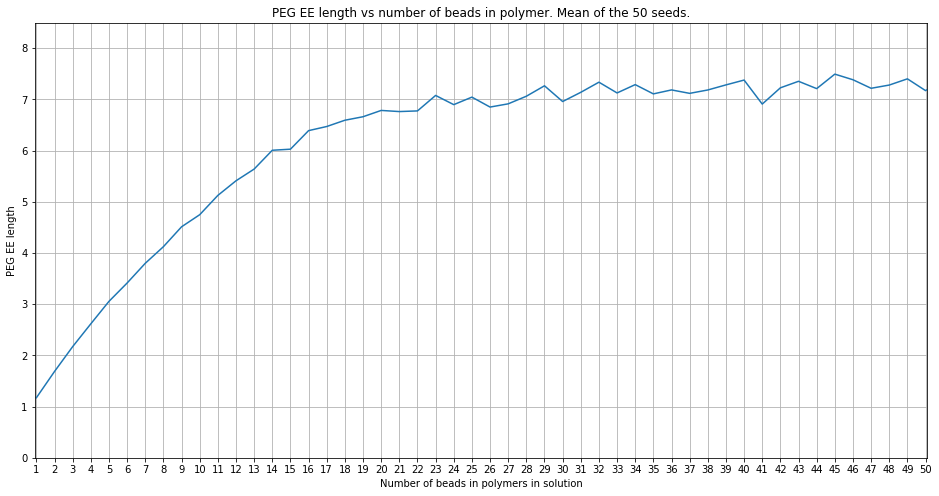

In [5]:
# Imports the data and puts it into a pandas dataframe
advanced_df3 = pd.read_csv('Results/2019.11.13-181218/results.log',sep='\t', header = 0)
# Rename the column to drop the '\t'
advanced_df3.columns=['N_bead','Mean','Std','Seed','FracP']

# Takes the mean for all seeds, then plot mean Ree length for all seeds vs number of polymers in solution
advanced_df3_mean = advanced_df3.groupby(['N_bead']).mean()

plt.figure(figsize=(16,8))
plt.plot(advanced_df3_mean.index, advanced_df3_mean.Mean)

plt.xlabel('Number of beads in polymers in solution')
plt.ylabel('PEG EE length')
plt.title('PEG EE length vs number of beads in polymer. Mean of the 50 seeds.')

plt.xlim([.9,50.1])
plt.ylim([0,advanced_df3_mean.Mean.max()+1])
plt.grid(which='both')
plt.xticks(range(1,51,1));

We observe an expected linear behaviour when the number of beads is low, but the situation becomes asymptotical in the region above 20-25, thus we will use a number of beads in our polymer that is well above that, let's say 30.
Picking a higher number in the middle of the limit behaviour reduces computational complexity while still being far outside the region where changes occur.